In [128]:
import pandas as pd
import numpy as np
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from tvDatafeed import TvDatafeed, Interval
import statistics
import matplotlib.pyplot as plt

In [129]:
tv=TvDatafeed()

In [130]:
df=tv.get_hist(symbol='NIFTY_50',exchange='NSE',interval=Interval.in_daily, n_bars=100)

In [131]:
df['sma_30days']=df['close'].rolling(window=30).mean()
df['upper_bollinger']=df['sma_30days']+1.5*df['close'].rolling(window=30).std()
df['lower_bollinger']=df['sma_30days']-1.5*df['close'].rolling(window=30).std()

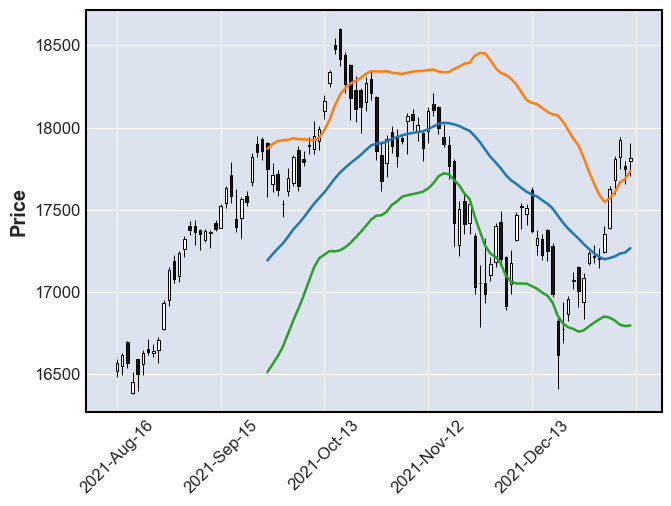

In [132]:
bollinger=df[['sma_30days','upper_bollinger','lower_bollinger']]
apd=[mpf.make_addplot(bollinger)]
op=mpf.plot(df,type='candle', volume=False, addplot=apd)


In [133]:
buy=np.where(df['close'].shift(1)>df['upper_bollinger'].shift(1),1,np.nan)*0.99*df['low']
sell=np.where(df['close'].shift(1)<df['lower_bollinger'].shift(1),1,np.nan)*1.01*df['low']

In [134]:
apd=[mpf.make_addplot(buy, scatter=True, markersize=50, marker=r'$\Uparrow$', color='green'),mpf.make_addplot(sell, scatter=True, markersize=50, marker=r'$\Downarrow$', color='red'),mpf.make_addplot(bollinger)]

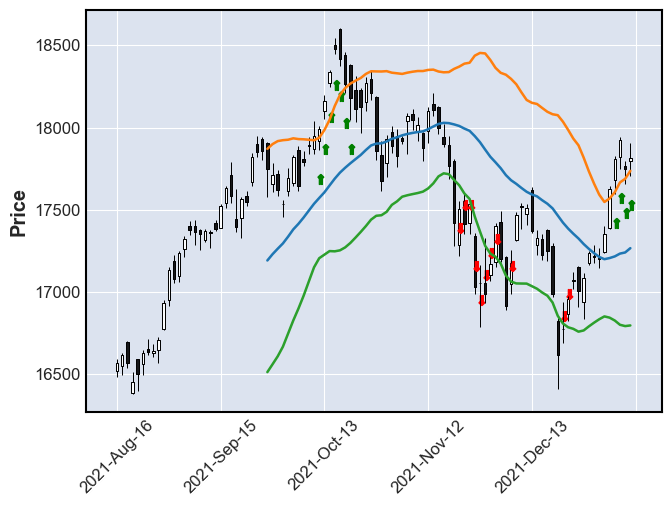

In [135]:
mpf.plot(df, type='candle', volume=False, addplot=apd)


In [136]:
pnl=buy.sum()-sell.sum()
pnl

6764.126000000018